In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import spatial
from igl import igl
from local_global import local_global

In [8]:
data = 'data/non_regular_lp.obj'
local_contraction = 0.8

lg = local_global(data)
#lg.lam1 = 1.0
#lg.lam2 = 1.0

lg.precomputation()
#lg.local_global_n_step(25) # pre streching looking for ARAP transformation
_,lms_prior,_ = lg.strech_and_angle() # 
lg.lam1 = 1/local_contraction
lg.lam2 = np.sqrt(local_contraction)

lg.local_global_n_step(50)
_,lms_final,_ = lg.strech_and_angle() # 


[1.25, 0.8944271909999159]


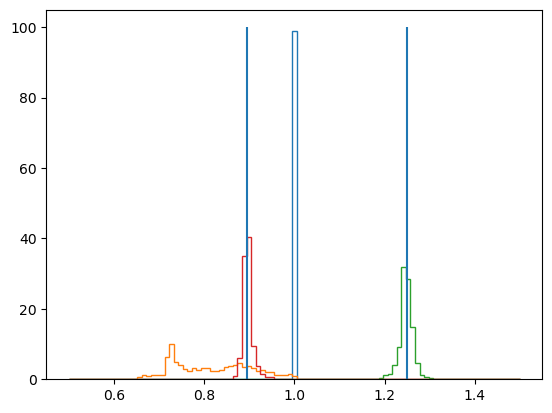

In [10]:
x= np.linspace(0.5,1.5,100)
fig,ax = plt.subplots()
h1 = ax.hist(lms_prior[:,0], bins=x, density = True, histtype='step', label='density')
h2 = ax.hist(lms_prior[:,1], bins=x, density = True, histtype='step', label='density')

h3 = ax.hist(lms_final[:,0], bins=x, density = True, histtype='step', label='density')
h4 = ax.hist(lms_final[:,1], bins=x, density = True, histtype='step', label='density')
lams_target = [lg.lam1,lg.lam2]
ax.vlines(lams_target,0,100)
print(lams_target)